In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [106]:
# Load the CSV file
file_path = r's:\study\data scientist\Masters\Hof\PCMC\Lab Session #1-20251103\4Stu_2022_1117_1219 DataWithToolInfo.csv'

print("Loading CSV file...")
df = pd.read_csv(file_path,sep=';',parse_dates=['timestamp_skv','timestamp_sensor','timestamp','timestamp.1','timestamp.2'])

print(f"\n✓ Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nFirst few rows:")
df.head()

Loading CSV file...

✓ Dataset loaded successfully!
Shape: 107,160 rows × 165 columns

First few rows:

✓ Dataset loaded successfully!
Shape: 107,160 rows × 165 columns

First few rows:


,timestamp_skv,timediff_skv,timestamp_sensor,timediff_sensor,SynchroDiff,ST_CH1_P_F0,ST_CH1_P_F1,ST_CH1_P_F2,ST_CH1_P_F3,ST_CH1_P_F4,ST_CH1_P_F5,ST_CH1_P_F6,ST_CH1_P_F7,ST_CH1_P_F8,ST_CH1_P_F9,ST_CH1_P_F10,ST_CH1_P_F11,ST_CH1_P_Time,ST_CH1_P0_F0,ST_CH1_P0_F1,ST_CH1_P0_F2,ST_CH1_P0_F3,ST_CH1_P0_F4,ST_CH1_P0_F5,ST_CH1_P0_F6,ST_CH1_P0_F7,ST_CH1_P0_F8,ST_CH1_P0_F9,ST_CH1_P0_F10,ST_CH1_P0_F11,ST_CH1_P0_Time,ST_CH1_P1_F0,ST_CH1_P1_F1,ST_CH1_P1_F2,ST_CH1_P1_F3,ST_CH1_P1_F4,ST_CH1_P1_F5,ST_CH1_P1_F6,ST_CH1_P1_F7,ST_CH1_P1_F8,ST_CH1_P1_F9,ST_CH1_P1_F10,ST_CH1_P1_F11,ST_CH1_P1_Time,ST_CH1_P2_F0,ST_CH1_P2_F1,ST_CH1_P2_F2,ST_CH1_P2_F3,ST_CH1_P2_F4,ST_CH1_P2_F5,ST_CH1_P2_F6,ST_CH1_P2_F7,ST_CH1_P2_F8,ST_CH1_P2_F9,ST_CH1_P2_F10,ST_CH1_P2_F11,ST_CH1_P2_Time,ST_CH2_P_F0,ST_CH2_P_F1,ST_CH2_P_F2,ST_CH2_P_F3,ST_CH2_P_F4,ST_CH2_P_F5,ST_CH2_P_F6,ST_CH2_P_F7,ST_CH2_P_F8,ST_CH2_P_F9,ST_CH2_P_F10,ST_CH2_P_F11,ST_CH2_P_Time,ST_CH2_P0_F0,ST_CH2_P0_F1,ST_CH2_P0_F2,ST_CH2_P0_F3,ST_CH2_P0_F4,ST_CH2_P0_F5,ST_CH2_P0_F6,ST_CH2_P0_F7,ST_CH2_P0_F8,ST_CH2_P0_F9,ST_CH2_P0_F10,ST_CH2_P0_F11,ST_CH2_P0_Time,ST_CH2_P1_F0,ST_CH2_P1_F1,ST_CH2_P1_F2,ST_CH2_P1_F3,ST_CH2_P1_F4,ST_CH2_P1_F5,ST_CH2_P1_F6,ST_CH2_P1_F7,ST_CH2_P1_F8,ST_CH2_P1_F9,ST_CH2_P1_F10,ST_CH2_P1_F11,ST_CH2_P1_Time,ST_CH2_P2_F0,ST_CH2_P2_F1,ST_CH2_P2_F2,ST_CH2_P2_F3,ST_CH2_P2_F4,ST_CH2_P2_F5,ST_CH2_P2_F6,ST_CH2_P2_F7,ST_CH2_P2_F8,ST_CH2_P2_F9,ST_CH2_P2_F10,ST_CH2_P2_F11,ST_CH2_P2_Time,4.713 SKV#1,0.604 min SKV#1,0.604 max SKV#1,0.74 min SKV#1,0.74 max SKV#1,"4,96 SKV#1","4,40 SKV#1","5,36 SKV#1","5,92 SKV#1",Sym aussen SKV#1,Sym Einstich SKV#1,Licht-Einstich frei SKV#1,4.713 SKV#2,0.604 min SKV#2,0.604 max SKV#2,0.74 min SKV#2,0.74 max SKV#2,"4,96 SKV#2","4,40 SKV#2","5,36 SKV#2","5,92 SKV#2",Sym Einstich SKV#2,Sym aussen SKV#2,Licht-Einstich frei SKV#2,4.713 SKV#3,0.604 min SKV#3,0.604 max SKV#3,0.74 min SKV#3,0.74 max SKV#3,"4,96 SKV#3","4,40 SKV#3","5,36 SKV#3","5,92 SKV#3",Sym Einstich SKV#3,Sym aussen SKV#3,Licht-Einstich frei SKV#3,4.713 SKV#4,0.604 min SKV#4,0.604 max SKV#4,0.74 min SKV#4,0.74 max SKV#4,"4,96 SKV#4","4,40 SKV#4","5,36 SKV#4","5,92 SKV#4",Sym Einstich SKV#4,Sym aussen SKV#4,Licht-Einstich frei SKV#4,timestamp,Beacon INT0028 - BME280_RH,timestamp.1,Beacon INT0028 - BMP280_PRESS,timestamp.2,Beacon INT0028 - BMP280_TEMP,pieces,tool io
0,2022-11-17 16:33:49.400,0.0,2022-11-17 16:33:49.506,0.0,0.106,0.001282,0.000000e+00,9.528109e-08,0.057929,0.020091,1.327992e-04,0.000017,0.000033,0.001752,0.000030,0.077239,2.465726e-13,-37.505,0.003124,0.003845,0.000010,1.0,0.020091,0.432020,2.937199e-07,0.001948,0.007690,0.001772,0.063266,1.485655e-11,-62.883,0.001530,0.005249,8.525751e-07,0.364422,0.009451,0.125858,7.585417e-08,0.000394,0.006774,0.000576,0.082633,2.584330e-12,-69.437,0.000977,0.024658,9.546103e-07,1.0,0.005274,0.773180,3.462037e-08,0.000711,0.001709,0.001381,0.111406,6.270418e-13,-72.428,0.001174,0.000007,1.413827e-07,0.102639,0.023598,0.005733,0.000015,0.000047,0.001938,0.000032,0.116880,4.413320e-14,0.0,0.003414,0.001343,0.000012,1.0,0.023598,0.734092,6.929884e-07,0.001979,0.008850,0.001728,0.075898,1.682045e-12,-59.874,0.002292,0.005920,0.000002,0.455611,0.011768,0.217750,7.585417e-08,0.000776,0.002075,0.002438,0.065509,1.843108e-12,-66.428,0.001683,0.021973,0.000003,1.000000,0.009421,0.754380,6.943981e-08,0.001233,0.001953,0.001244,0.101501,6.064764e-13,-72.428,4.707,0.614,0.590,0.756,0.747,4.949,4.392,5.349,5.926,-0.036,0.010,255.0,4.707,0.628,0.598,0.764,0.740,4.945,4.380,5.329,5.918,0.014,-0.001,255.0,4.706,0.618,0.584,0.753,0.744,4.951,4.388,5.345,5.916,0.020,-0.019,255.0,4.717,0.629,0.593,0.763,0.741,4.955,4.390,5.345,5.899,0.034,-0.009,255.0,2022-11-17 04:31:39,28.905273,2022-11-17 04:31:39,936.01,2022-11-17 04:31:39,24.12,104563,0
1,2022-11-17 16:33:50.400,1.0,2022-11-17 16:33:51.006,1.5,0.606,0.001656,4.291534e-06,1.413794e-07,0.051529,0.036128,1.924038e-04,0.000017,0.000035,0.047299,0.000022,0.084805,2.772125e-13,-37.150,0.003855,0.005737,0.000015,1.0,0.036128,0.384472,

# Task 4: Drop Missing Values and Normalize Features

For each feature group, we will:
1. Check for missing values
2. Drop rows with missing features
3. Document the number of dropped rows
4. Normalize the remaining data column by column using StandardScaler

In [107]:
def drop_na_and_normalize(data, feature_cols):
    original_data = data.copy()
    initial_row_count = data.shape[0]
    
    # Drop rows with NaN values in the specified feature columns
    missing_values = data[feature_cols].isnull().sum()
    cleaned_data = data.dropna(subset=feature_cols)
    rows_dropped = initial_row_count - cleaned_data.shape[0]
    
    
    result = {
        'missing_values': missing_values,  
        'cleaned_data': cleaned_data,
        'rows_dropped': rows_dropped,
    }
    
    return result

### ST_CH1_P_*

In [108]:
ch1_p = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH1_P_' in m])

In [109]:
ch1_p['missing_values']

ST_CH1_P_F0      0
ST_CH1_P_F1      0
ST_CH1_P_F2      0
ST_CH1_P_F3      0
ST_CH1_P_F4      0
ST_CH1_P_F5      0
ST_CH1_P_F6      0
ST_CH1_P_F7      0
ST_CH1_P_F8      0
ST_CH1_P_F9      0
ST_CH1_P_F10     0
ST_CH1_P_F11     0
ST_CH1_P_Time    0
dtype: int64

### ST_CH1_P0_*

In [110]:
ch1_p0 = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH1_P0_' in m])

In [111]:
ch1_p0['missing_values']

ST_CH1_P0_F0      0
ST_CH1_P0_F1      0
ST_CH1_P0_F2      0
ST_CH1_P0_F3      0
ST_CH1_P0_F4      0
ST_CH1_P0_F5      0
ST_CH1_P0_F6      0
ST_CH1_P0_F7      0
ST_CH1_P0_F8      0
ST_CH1_P0_F9      0
ST_CH1_P0_F10     0
ST_CH1_P0_F11     0
ST_CH1_P0_Time    0
dtype: int64

### ST_CH1_P1_*

In [112]:
ch1_p1 = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH1_P1_' in m])

In [113]:
ch1_p1['missing_values']

ST_CH1_P1_F0      0
ST_CH1_P1_F1      0
ST_CH1_P1_F2      0
ST_CH1_P1_F3      0
ST_CH1_P1_F4      0
ST_CH1_P1_F5      0
ST_CH1_P1_F6      0
ST_CH1_P1_F7      0
ST_CH1_P1_F8      0
ST_CH1_P1_F9      0
ST_CH1_P1_F10     0
ST_CH1_P1_F11     0
ST_CH1_P1_Time    0
dtype: int64

### ST_CH1_P2_*

In [114]:
ch1_p2 = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH1_P2_' in m])

In [115]:
ch1_p2['missing_values']

ST_CH1_P2_F0      0
ST_CH1_P2_F1      0
ST_CH1_P2_F2      0
ST_CH1_P2_F3      0
ST_CH1_P2_F4      0
ST_CH1_P2_F5      0
ST_CH1_P2_F6      0
ST_CH1_P2_F7      0
ST_CH1_P2_F8      0
ST_CH1_P2_F9      0
ST_CH1_P2_F10     0
ST_CH1_P2_F11     0
ST_CH1_P2_Time    0
dtype: int64

### ST_CH2_P_*

In [116]:
ch2_p = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH2_P_' in m])

In [117]:
ch2_p['missing_values']

ST_CH2_P_F0      0
ST_CH2_P_F1      0
ST_CH2_P_F2      0
ST_CH2_P_F3      0
ST_CH2_P_F4      0
ST_CH2_P_F5      0
ST_CH2_P_F6      0
ST_CH2_P_F7      0
ST_CH2_P_F8      0
ST_CH2_P_F9      0
ST_CH2_P_F10     0
ST_CH2_P_F11     0
ST_CH2_P_Time    0
dtype: int64

### ST_CH2_P0_*

In [118]:
ch2_p0 = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH2_P0_' in m])

In [119]:
ch2_p0['missing_values']

ST_CH2_P0_F0      0
ST_CH2_P0_F1      0
ST_CH2_P0_F2      0
ST_CH2_P0_F3      0
ST_CH2_P0_F4      0
ST_CH2_P0_F5      0
ST_CH2_P0_F6      0
ST_CH2_P0_F7      0
ST_CH2_P0_F8      0
ST_CH2_P0_F9      0
ST_CH2_P0_F10     0
ST_CH2_P0_F11     0
ST_CH2_P0_Time    0
dtype: int64

### ST_CH2_P1_*

In [120]:
ch2_p1 = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH2_P1_' in m])

In [121]:
ch2_p['missing_values']

ST_CH2_P_F0      0
ST_CH2_P_F1      0
ST_CH2_P_F2      0
ST_CH2_P_F3      0
ST_CH2_P_F4      0
ST_CH2_P_F5      0
ST_CH2_P_F6      0
ST_CH2_P_F7      0
ST_CH2_P_F8      0
ST_CH2_P_F9      0
ST_CH2_P_F10     0
ST_CH2_P_F11     0
ST_CH2_P_Time    0
dtype: int64

### ST_CH2_P2_*

In [122]:
ch2_p2 = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH2_P2_' in m])

In [123]:
ch2_p2['missing_values']

ST_CH2_P2_F0      0
ST_CH2_P2_F1      0
ST_CH2_P2_F2      0
ST_CH2_P2_F3      0
ST_CH2_P2_F4      0
ST_CH2_P2_F5      0
ST_CH2_P2_F6      0
ST_CH2_P2_F7      0
ST_CH2_P2_F8      0
ST_CH2_P2_F9      0
ST_CH2_P2_F10     0
ST_CH2_P2_F11     0
ST_CH2_P2_Time    0
dtype: int64

### SKV*

In [124]:
skv_cols = [m for m in df.columns if 'SKV' in m]

In [125]:
df[skv_cols].isna().sum()

4.713 SKV#1                   0
0.604 min SKV#1               1
0.604 max SKV#1               1
0.74 min SKV#1                1
0.74 max SKV#1                1
4,96 SKV#1                    1
4,40 SKV#1                    1
5,36 SKV#1                    1
5,92 SKV#1                    0
Sym aussen SKV#1              1
Sym Einstich SKV#1            1
Licht-Einstich frei SKV#1     0
4.713 SKV#2                  16
0.604 min SKV#2              16
0.604 max SKV#2              16
0.74 min SKV#2               16
0.74 max SKV#2               16
4,96 SKV#2                   16
4,40 SKV#2                   16
5,36 SKV#2                   16
5,92 SKV#2                   16
Sym Einstich SKV#2           16
Sym aussen SKV#2             16
Licht-Einstich frei SKV#2     0
4.713 SKV#3                  13
0.604 min SKV#3              13
0.604 max SKV#3              13
0.74 min SKV#3               13
0.74 max SKV#3               13
4,96 SKV#3                   13
4,40 SKV#3                   13
5,36 SKV

In [126]:
df[skv_cols].isna().sum().sum()

np.int64(330)

* Total 330 Null values

In [127]:
# drop Null values
df_ori = df.copy()
df_dropped = df[skv_cols].dropna()
dropped_row = df_ori.shape[0] - df_dropped.shape[0]
dropped_row

32

* 32 Rows total dropped 

In [128]:
df.isna().sum()

timestamp_skv                    0
timediff_skv                     5
timestamp_sensor                 0
timediff_sensor                  5
SynchroDiff                      0
                                ..
Beacon INT0028 - BMP280_PRESS    0
timestamp.2                      0
Beacon INT0028 - BMP280_TEMP     0
pieces                           0
tool io                          0
Length: 165, dtype: int64

* There are missing values also available in timestamps

In [129]:
df.dropna(inplace=True)

In [130]:
non_time_cols = [m for m in df.columns if 'time' not in m and 'pieces' not in m and 'ST_CH1_P_Time' not in m]

In [131]:
# not taking 'timediff_sensor' -> Its time at the end

non_time_cols

['SynchroDiff',
 'ST_CH1_P_F0',
 'ST_CH1_P_F1',
 'ST_CH1_P_F2',
 'ST_CH1_P_F3',
 'ST_CH1_P_F4',
 'ST_CH1_P_F5',
 'ST_CH1_P_F6',
 'ST_CH1_P_F7',
 'ST_CH1_P_F8',
 'ST_CH1_P_F9',
 'ST_CH1_P_F10',
 'ST_CH1_P_F11',
 'ST_CH1_P0_F0',
 'ST_CH1_P0_F1',
 'ST_CH1_P0_F2',
 'ST_CH1_P0_F3',
 'ST_CH1_P0_F4',
 'ST_CH1_P0_F5',
 'ST_CH1_P0_F6',
 'ST_CH1_P0_F7',
 'ST_CH1_P0_F8',
 'ST_CH1_P0_F9',
 'ST_CH1_P0_F10',
 'ST_CH1_P0_F11',
 'ST_CH1_P0_Time',
 'ST_CH1_P1_F0',
 'ST_CH1_P1_F1',
 'ST_CH1_P1_F2',
 'ST_CH1_P1_F3',
 'ST_CH1_P1_F4',
 'ST_CH1_P1_F5',
 'ST_CH1_P1_F6',
 'ST_CH1_P1_F7',
 'ST_CH1_P1_F8',
 'ST_CH1_P1_F9',
 'ST_CH1_P1_F10',
 'ST_CH1_P1_F11',
 'ST_CH1_P1_Time',
 'ST_CH1_P2_F0',
 'ST_CH1_P2_F1',
 'ST_CH1_P2_F2',
 'ST_CH1_P2_F3',
 'ST_CH1_P2_F4',
 'ST_CH1_P2_F5',
 'ST_CH1_P2_F6',
 'ST_CH1_P2_F7',
 'ST_CH1_P2_F8',
 'ST_CH1_P2_F9',
 'ST_CH1_P2_F10',
 'ST_CH1_P2_F11',
 'ST_CH1_P2_Time',
 'ST_CH2_P_F0',
 'ST_CH2_P_F1',
 'ST_CH2_P_F2',
 'ST_CH2_P_F3',
 'ST_CH2_P_F4',
 'ST_CH2_P_F5',
 'ST_CH2_P_F6',
 'S

In [132]:
scaler = MinMaxScaler()
df[non_time_cols] = scaler.fit_transform(df[non_time_cols])

In [133]:
df

,timestamp_skv,timediff_skv,timestamp_sensor,timediff_sensor,SynchroDiff,ST_CH1_P_F0,ST_CH1_P_F1,ST_CH1_P_F2,ST_CH1_P_F3,ST_CH1_P_F4,ST_CH1_P_F5,ST_CH1_P_F6,ST_CH1_P_F7,ST_CH1_P_F8,ST_CH1_P_F9,ST_CH1_P_F10,ST_CH1_P_F11,ST_CH1_P_Time,ST_CH1_P0_F0,ST_CH1_P0_F1,ST_CH1_P0_F2,ST_CH1_P0_F3,ST_CH1_P0_F4,ST_CH1_P0_F5,ST_CH1_P0_F6,ST_CH1_P0_F7,ST_CH1_P0_F8,ST_CH1_P0_F9,ST_CH1_P0_F10,ST_CH1_P0_F11,ST_CH1_P0_Time,ST_CH1_P1_F0,ST_CH1_P1_F1,ST_CH1_P1_F2,ST_CH1_P1_F3,ST_CH1_P1_F4,ST_CH1_P1_F5,ST_CH1_P1_F6,ST_CH1_P1_F7,ST_CH1_P1_F8,ST_CH1_P1_F9,ST_CH1_P1_F10,ST_CH1_P1_F11,ST_CH1_P1_Time,ST_CH1_P2_F0,ST_CH1_P2_F1,ST_CH1_P2_F2,ST_CH1_P2_F3,ST_CH1_P2_F4,ST_CH1_P2_F5,ST_CH1_P2_F6,ST_CH1_P2_F7,ST_CH1_P2_F8,ST_CH1_P2_F9,ST_CH1_P2_F10,ST_CH1_P2_F11,ST_CH1_P2_Time,ST_CH2_P_F0,ST_CH2_P_F1,ST_CH2_P_F2,ST_CH2_P_F3,ST_CH2_P_F4,ST_CH2_P_F5,ST_CH2_P_F6,ST_CH2_P_F7,ST_CH2_P_F8,ST_CH2_P_F9,ST_CH2_P_F10,ST_CH2_P_F11,ST_CH2_P_Time,ST_CH2_P0_F0,ST_CH2_P0_F1,ST_CH2_P0_F2,ST_CH2_P0_F3,ST_CH2_P0_F4,ST_CH2_P0_F5,ST_CH2_P0_F6,ST_CH2_P0_F7,ST_CH2_P0_F8,ST_CH2_P0_F9,ST_CH2_P0_F10,ST_CH2_P0_F11,ST_CH2_P0_Time,ST_CH2_P1_F0,ST_CH2_P1_F1,ST_CH2_P1_F2,ST_CH2_P1_F3,ST_CH2_P1_F4,ST_CH2_P1_F5,ST_CH2_P1_F6,ST_CH2_P1_F7,ST_CH2_P1_F8,ST_CH2_P1_F9,ST_CH2_P1_F10,ST_CH2_P1_F11,ST_CH2_P1_Time,ST_CH2_P2_F0,ST_CH2_P2_F1,ST_CH2_P2_F2,ST_CH2_P2_F3,ST_CH2_P2_F4,ST_CH2_P2_F5,ST_CH2_P2_F6,ST_CH2_P2_F7,ST_CH2_P2_F8,ST_CH2_P2_F9,ST_CH2_P2_F10,ST_CH2_P2_F11,ST_CH2_P2_Time,4.713 SKV#1,0.604 min SKV#1,0.604 max SKV#1,0.74 min SKV#1,0.74 max SKV#1,"4,96 SKV#1","4,40 SKV#1","5,36 SKV#1","5,92 SKV#1",Sym aussen SKV#1,Sym Einstich SKV#1,Licht-Einstich frei SKV#1,4.713 SKV#2,0.604 min SKV#2,0.604 max SKV#2,0.74 min SKV#2,0.74 max SKV#2,"4,96 SKV#2","4,40 SKV#2","5,36 SKV#2","5,92 SKV#2",Sym Einstich SKV#2,Sym aussen SKV#2,Licht-Einstich frei SKV#2,4.713 SKV#3,0.604 min SKV#3,0.604 max SKV#3,0.74 min SKV#3,0.74 max SKV#3,"4,96 SKV#3","4,40 SKV#3","5,36 SKV#3","5,92 SKV#3",Sym Einstich SKV#3,Sym aussen SKV#3,Licht-Einstich frei SKV#3,4.713 SKV#4,0.604 min SKV#4,0.604 max SKV#4,0.74 min SKV#4,0.74 max SKV#4,"4,96 SKV#4","4,40 SKV#4","5,36 SKV#4","5,92 SKV#4",Sym Einstich SKV#4,Sym aussen SKV#4,Licht-Einstich frei SKV#4,timestamp,Beacon INT0028 - BME280_RH,timestamp.1,Beacon INT0028 - BMP280_PRESS,timestamp.2,Beacon INT0028 - BMP280_TEMP,pieces,tool io
0,2022-11-17 16:33:49.400,0.0,2022-11-17 16:33:49.506,0.000,0.535357,0.148016,0.000000,0.047576,0.394534,0.003782,0.036737,0.000774,0.319300,0.011642,0.088070,0.222624,0.029954,-37.505,0.153279,0.185629,0.045486,1.0,0.074370,0.468272,0.886423,0.319086,0.076978,0.088727,0.192975,0.052778,0.478743,0.169692,0.276873,0.048893,0.166927,0.307403,0.127296,0.364587,0.124456,0.092721,0.074031,0.119076,0.102831,0.478742,0.152846,0.666667,0.099602,1.000000,0.248804,0.773604,0.085180,0.307744,0.025097,0.241919,0.166429,0.033680,0.478142,0.178371,0.023659,0.060322,0.827128,0.417897,0.252786,0.000286,0.174884,0.024676,0.028644,0.204493,0.016828,0.0,0.326410,0.043137,0.134177,1.000000,0.450348,0.759760,0.814996,0.273720,0.053381,0.055197,0.108654,0.012444,0.447156,0.175643,0.255263,0.081163,0.432001,0.343316,0.219053,0.111999,0.186909,0.026901,0.257797,0.124409,0.064534,0.447156,0.214885,0.543807,0.090708,1.000000,0.391185,0.754979,0.273943,0.290451,0.034722,0.069904,0.230524,0.015529,0.446897,0.352941,0.757895,0.631579,0.779412,0.782609,0.077465,0.280702,0.218045,0.552941,0.228070,0.266667,1.0,0.375,0.976471,0.384615,0.942857,0.333333,0.129032,0.067568,0.125000,0.360825,0.646341,0.552846,1.0,0.571429,0.83,0.580645,0.857143,0.461538,0.250000,0.083333,0.287234,0.419355,0.193182,0.158333,0.0,0.100402,0.991694,0.210526,0.895833,0.3125,0.072581,0.033981,0.191304,0.289855,0.898305,0.838710,1.0,2022-11-17 04:31:39,0.782788,2022-11-17 04:31:39,0.012087,2022-11-17 04:31:39,0.798658,104563,0.0
1,2022-11-17 16:33:50.400,1.0,2022-11-17 16:33:51.006,1.500,0.702135,0.220171,0.084906,0.075500,0.148008,0.114286,0.053225,0.000774,0.347603,0.508095,0.059476,0.302551,0.033846,-37.150,0.

In [134]:
df.describe()

,timestamp_skv,timediff_skv,timestamp_sensor,timediff_sensor,SynchroDiff,ST_CH1_P_F0,ST_CH1_P_F1,ST_CH1_P_F2,ST_CH1_P_F3,ST_CH1_P_F4,ST_CH1_P_F5,ST_CH1_P_F6,ST_CH1_P_F7,ST_CH1_P_F8,ST_CH1_P_F9,ST_CH1_P_F10,ST_CH1_P_F11,ST_CH1_P_Time,ST_CH1_P0_F0,ST_CH1_P0_F1,ST_CH1_P0_F2,ST_CH1_P0_F3,ST_CH1_P0_F4,ST_CH1_P0_F5,ST_CH1_P0_F6,ST_CH1_P0_F7,ST_CH1_P0_F8,ST_CH1_P0_F9,ST_CH1_P0_F10,ST_CH1_P0_F11,ST_CH1_P0_Time,ST_CH1_P1_F0,ST_CH1_P1_F1,ST_CH1_P1_F2,ST_CH1_P1_F3,ST_CH1_P1_F4,ST_CH1_P1_F5,ST_CH1_P1_F6,ST_CH1_P1_F7,ST_CH1_P1_F8,ST_CH1_P1_F9,ST_CH1_P1_F10,ST_CH1_P1_F11,ST_CH1_P1_Time,ST_CH1_P2_F0,ST_CH1_P2_F1,ST_CH1_P2_F2,ST_CH1_P2_F3,ST_CH1_P2_F4,ST_CH1_P2_F5,ST_CH1_P2_F6,ST_CH1_P2_F7,ST_CH1_P2_F8,ST_CH1_P2_F9,ST_CH1_P2_F10,ST_CH1_P2_F11,ST_CH1_P2_Time,ST_CH2_P_F0,ST_CH2_P_F1,ST_CH2_P_F2,ST_CH2_P_F3,ST_CH2_P_F4,ST_CH2_P_F5,ST_CH2_P_F6,ST_CH2_P_F7,ST_CH2_P_F8,ST_CH2_P_F9,ST_CH2_P_F10,ST_CH2_P_F11,ST_CH2_P_Time,ST_CH2_P0_F0,ST_CH2_P0_F1,ST_CH2_P0_F2,ST_CH2_P0_F3,ST_CH2_P0_F4,ST_CH2_P0_F5,ST_CH2_P0_F6,ST_CH2_P0_F7,ST_CH2_P0_F8,ST_CH2_P0_F9,ST_CH2_P0_F10,ST_CH2_P0_F11,ST_CH2_P0_Time,ST_CH2_P1_F0,ST_CH2_P1_F1,ST_CH2_P1_F2,ST_CH2_P1_F3,ST_CH2_P1_F4,ST_CH2_P1_F5,ST_CH2_P1_F6,ST_CH2_P1_F7,ST_CH2_P1_F8,ST_CH2_P1_F9,ST_CH2_P1_F10,ST_CH2_P1_F11,ST_CH2_P1_Time,ST_CH2_P2_F0,ST_CH2_P2_F1,ST_CH2_P2_F2,ST_CH2_P2_F3,ST_CH2_P2_F4,ST_CH2_P2_F5,ST_CH2_P2_F6,ST_CH2_P2_F7,ST_CH2_P2_F8,ST_CH2_P2_F9,ST_CH2_P2_F10,ST_CH2_P2_F11,ST_CH2_P2_Time,4.713 SKV#1,0.604 min SKV#1,0.604 max SKV#1,0.74 min SKV#1,0.74 max SKV#1,"4,96 SKV#1","4,40 SKV#1","5,36 SKV#1","5,92 SKV#1",Sym aussen SKV#1,Sym Einstich SKV#1,Licht-Einstich frei SKV#1,4.713 SKV#2,0.604 min SKV#2,0.604 max SKV#2,0.74 min SKV#2,0.74 max SKV#2,"4,96 SKV#2","4,40 SKV#2","5,36 SKV#2","5,92 SKV#2",Sym Einstich SKV#2,Sym aussen SKV#2,Licht-Einstich frei SKV#2,4.713 SKV#3,0.604 min SKV#3,0.604 max SKV#3,0.74 min SKV#3,0.74 max SKV#3,"4,96 SKV#3","4,40 SKV#3","5,36 SKV#3","5,92 SKV#3",Sym Einstich SKV#3,Sym aussen SKV#3,Licht-Einstich frei SKV#3,4.713 SKV#4,0.604 min SKV#4,0.604 max SKV#4,0.74 min SKV#4,0.74 max SKV#4,"4,96 SKV#4","4,40 SKV#4","5,36 SKV#4","5,92 SKV#4",Sym Einstich SKV#4,Sym aussen SKV#4,Licht-Einstich frei SKV#4,timestamp,Beacon INT0028 - BME280_RH,timestamp.1,Beacon INT0028 - BMP280_PRESS,timestamp.2,Beacon INT0028 - BMP280_TEMP,pieces,tool io
count,107123,107123.000000,107123,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.0,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,107123.000000,1

## Task 5

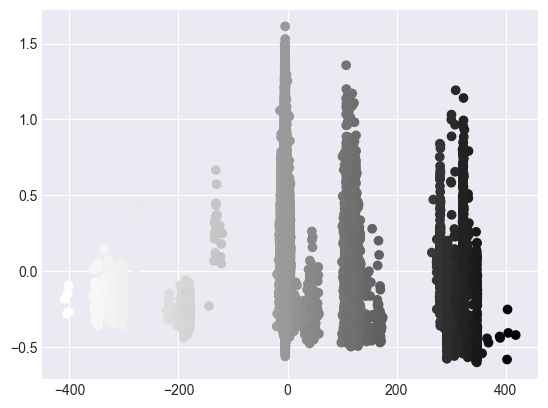

In [135]:
# 1. PCA on ST_CH1_P features
pca = PCA(n_components=13)
pca_result = pca.fit_transform(df[[m for m in df.columns if 'ST_CH1_P_' in m]])
# 2. Create scatter plot
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['ST_CH1_P_Time']) 


shows machine degredation from left to right 
left plot shows new or initial time, 